#Práctica de Clasificación
Naomi Padilla Mora A01745914

07 de marzo, 2022

##1.Librerías

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

##2.Lectura de datos

In [26]:
path = '/content/drive/MyDrive/Análisis de Ciencia de datos /Práctica de Clasificación/WineQT-1.csv'

In [27]:
df_wine = pd.read_csv(path)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Para esta actividad se realizará un análisis de la base de datos *WineQT* con el objetivo de crear un modelo de clasificación que permita categorizar los vinos por su calidad dentro de los valores 3 a 8. Siendo 8 la mejor calidad. 

##3.Tratado de datos

In [28]:
df_wine.drop(['Id'],axis=1,inplace=True)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
df_wine.isna().sum()/df_wine.shape[0]

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [30]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Al observar que la columna Id no proporciona ninguna información de valor para la creación del modelo se decidió retirar la misma. Además, sabiendo que no contamos con valores nulos en el dataset y que únicamente tratamos con datos numéricos, podemos continuar con el análisis.

##4.Selección de variables

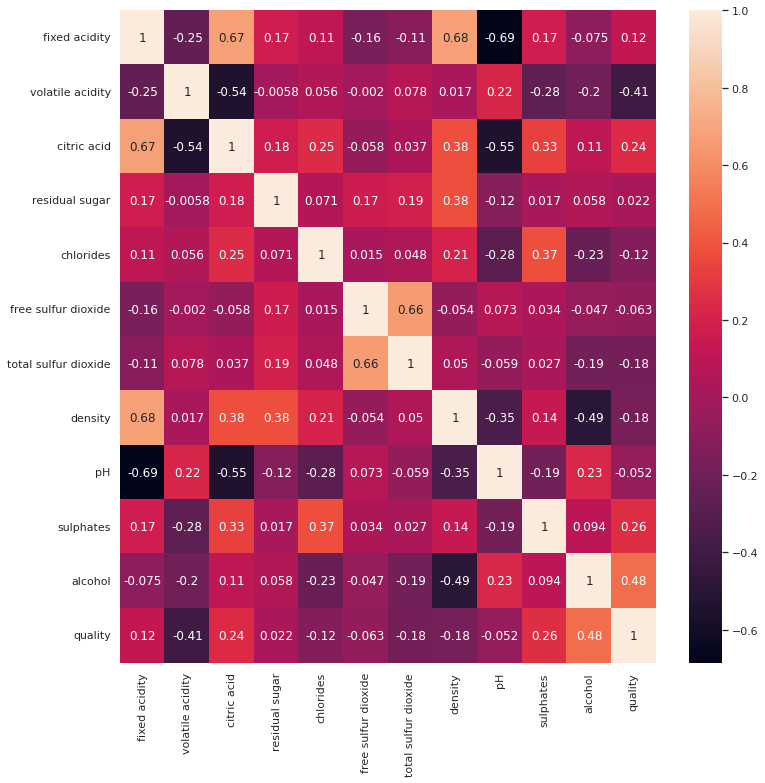

In [31]:
corrData= df_wine.corr()
sns.set(rc = {'figure.figsize':(12,12)})
sns.heatmap(corrData, annot=True)

Se decidió realizar un *heatmap* sobre las correlaciones entre las variables. Este es un paso muy importante ya que nos dice que variables influyen realmente en el valor *quality* que es nuestra variable de interés para predecir la calidad de los vinos. Podemos ver que variables como *residual sugar*, *free sulfur dioxide* y *pH* realmente no tienen una gran correlación con la "calidad" del vino, lo vemos en el valor tan cercano a 0, sin importar si es negativo o positivo. Por lo tanto, se eliminarán estas variables de la base de datos.

In [32]:
nonvar= ['quality','residual sugar','free sulfur dioxide','pH']
X = df_wine.drop(nonvar,axis=1)
Y = df_wine['quality']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.30,random_state=0,stratify=Y)
y_test.value_counts()

5    145
6    138
7     43
4     10
8      5
3      2
Name: quality, dtype: int64

##5.Modelo Decision Tree Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [35]:
model = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=20)

model.fit(X_train,y_train)  
predictions = model.predict(X_test)


print('Puntaje entrenamiento: {}\n'.format(model.score(X_train,y_train)))
print('Puntaje Test: {}\n'.format(model.score(X_test,y_test)))

Puntaje entrenamiento: 0.69875

Puntaje Test: 0.5860058309037901



In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.64      0.79      0.70       145
           6       0.55      0.54      0.54       138
           7       0.43      0.30      0.36        43
           8       0.00      0.00      0.00         5

    accuracy                           0.59       343
   macro avg       0.27      0.27      0.27       343
weighted avg       0.55      0.59      0.56       343



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Con base al resultado observado en el modelo podemos darnos cuenta que es un modelo muy deficiente tanto en el entrenamiento y en el test, al realizar el reporte de clasificación podemos observar que no hay precisión para la calidad 3,4 y 8, lo que indica que el modelo no encuentra los suficientes valores de estas categorías para poder realizar una predicción eficiente. Por ello, se realizará una binarización para intentar mejorar el modelo.

In [37]:
from sklearn.preprocessing import label_binarize
Y = label_binarize(Y, classes=[6,7,8])
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.30,random_state=0,stratify=Y)


##6.Modelo Random Forest

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
model = RandomForestClassifier(max_depth=10,max_leaf_nodes=50,random_state=0,n_estimators=100)
# Fit the model
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print('train score',model.score(X_train,y_train))
print('test score',model.score(X_test,y_test))

train score 0.8475
test score 0.597667638483965


In [40]:
#cross validation
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(max_depth=10,max_leaf_nodes=50)
scores = cross_val_score(model, X, Y, cv=5) 
print('scores:',scores)
print('Mean score:',scores.mean())
print('Score standard deviation:',scores.std())

scores: [0.65065502 0.48908297 0.60262009 0.46052632 0.59649123]
Mean score: 0.5598751244924538
Score standard deviation: 0.07251286183822069


Posterior a la binarización se aplicó el modelo de Random Forest, del cual podemos ver que el modelo mejoró un poco sin embergo, no es lo suficiente bueno para una predicción exacta y presenta bastante *overfitting*. Incluso al realizar un *cross validation* el modelo no se mejora lo suficiente. Por ello, se separarán los niveles de calidad en dos categorías, la primera con los del nivel 3 a 5 y la segunda con los del nivel 6 a 8, concentrándonos en estos últimos para especializar el modelo en la predicción de vinos de alta calidad.

In [41]:
df_wine['quality new']= df_wine['quality'] > 5
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality new
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,True
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False


In [42]:
Y = df_wine['quality new']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.30,random_state=0,stratify=Y)

In [43]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=10,max_leaf_nodes=10,random_state=0,n_estimators=100)
# Fit the model
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print('train score',model.score(X_train,y_train))
print('test score',model.score(X_test,y_test))

train score 0.79875
test score 0.7638483965014577


In [44]:
#cross validation
model = RandomForestClassifier(max_depth=10,max_leaf_nodes=10)
scores = cross_val_score(model, X, Y, cv=5) 
print('scores:',scores)
print('Mean score:',scores.mean())
print('Score standard deviation:',scores.std())

scores: [0.74672489 0.74235808 0.76419214 0.74561404 0.74122807]
Mean score: 0.7480234428866928
Score standard deviation: 0.008332966866750216


Por último, después de separar el dataset en categorías, se aplicó un modelo de Random Forest con 100 árboles, una profundiad de 10 y 10 hojas se obtiene un buen modelo, sin *overfitting*. También, es posible comprobarlo con el cross validation.

##7.Conclusión
Se puede concluir que este modelo resulta eficiente, con un error aceptable, para la clasificación de vinos de calidad. Además, se comprende que para poder realizar un modelo eficiente de clasificación en todos los niveles se requiere mayor cantidad de datos para los niveles 3,4 y 8 ya que, esto permitiría que el modelo tenga un buen entrenamiento. 